In [5]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from matplotlib_venn import venn3, venn3_circles
from venn import venn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
HGNC = pd.read_csv("/Users/jiayao/Work/Resources/protein-coding_gene.txt", delimiter="\t")
ENSID2Entrez = dict(zip(HGNC["ensembl_gene_id"].values, HGNC["entrez_id"].values))
GeneSymbol2Entrez = dict(zip(HGNC["symbol"].values, HGNC["entrez_id"].values))
Entrez2Symbol = dict(zip(HGNC["entrez_id"].values, HGNC["symbol"].values))
allen_mouse_genes = loadgenelist("../dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
ExpZscoreMat = "../dat/allen-mouse-exp/energy-zscore-conn-model.csv"
ExpZscoreMat = pd.read_csv(ExpZscoreMat, index_col="ROW")

In [3]:
BrainSpan = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/expression_matrix.csv",
                   delimiter=",", header = None, names=None)
BrainSpan.head(2)
BrainSpan_rowmeta = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/rows_metadata.csv",
                               delimiter=",")
Brain_expressed_genes = []
Brain_expressed_exps = []
for i, row in BrainSpan.iterrows():
    try:
        entrez_id = int(BrainSpan_rowmeta.loc[i, "entrez_id"])
    except:
        continue
    avg_exp = np.mean(row[1:])
    if avg_exp > 1:
        Brain_expressed_genes.append(entrez_id)
        Brain_expressed_exps.append(avg_exp)
new_df = pd.DataFrame(data={"genes":Brain_expressed_genes, "exp":Brain_expressed_exps})
mouse_genes = [int(x.strip()) for x in open("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt",
                              'rt')]
new_df = new_df[new_df["genes"].isin(mouse_genes)]
brain_exp_genes = new_df["genes"].values

In [5]:
print(len(brain_exp_genes))

11391


In [6]:
brain_exp_genes[:10]

array([ 7105,  8813, 57147,  2268,  3075,  2519,  2729,  4800, 90529,
       57185])

In [8]:
with open("/Users/jiayao/Work/ASD_Circuits/dat/genes/brainspan_express.txt", "wt") as f:
    for g in brain_exp_genes:
        f.write(str(g)+"\n")

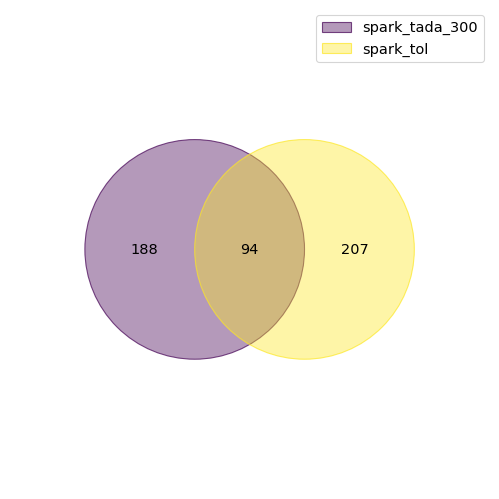

In [61]:
asc_genes = loadgenelist("../dat/genes/asd.spark.tada.300.txt")
ssc_genes = loadgenelist("../dat/genes/Jon.spark.txt")
allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")
asc_genes_m = set(asc_genes).intersection(set(allen_mouse_genes))
ssc_genes_m = set(ssc_genes).intersection(set(allen_mouse_genes))
dat_dict = {"spark_tada_300": asc_genes_m, "spark_tol":ssc_genes_m}
venn(dat_dict)

0.8013029315960912


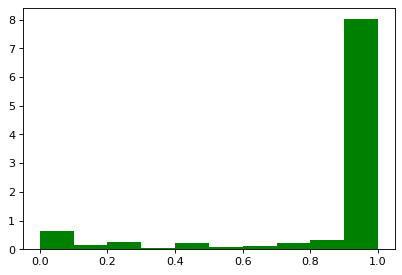

0.6758620689655173


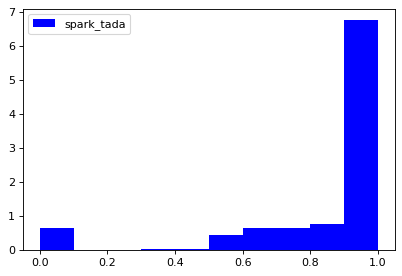

In [62]:
# Compare pLI
spark_tol_genes = loadgenelist("../dat/genes/Jon.spark.txt")
spark_tada_genes = loadgenelist("../dat/genes/asd.spark.tada.300.txt")

pli_spark_wigler = pli[pli["gene"].isin([Entrez2Symbol[x] for x in spark_tol_genes if x in Entrez2Symbol])]["pLI"].values
pli_spark_tada = pli[pli["gene"].isin([Entrez2Symbol[x] for x in spark_tada_genes if x in Entrez2Symbol])]["pLI"].values

plt.hist(pli_spark_wigler, color="green", label="spark_tol", density=1)
print(len([x for x in pli_spark_wigler if x > 0.9])/len(pli_spark_wigler))
plt.show()
plt.hist(pli_spark_tada, color="blue", label="spark_tada", density=1)
print(len([x for x in pli_spark_tada if x > 0.9])/len(pli_spark_tada))
plt.legend()
plt.show()

105
0.9405940594059405


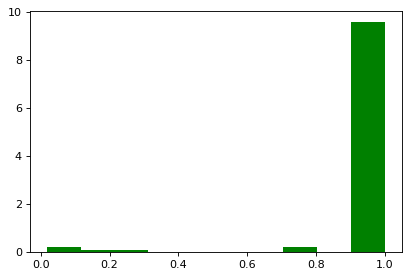

0.8785046728971962


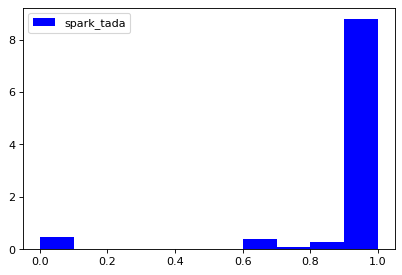

In [63]:
ssc_spark_tal = pd.read_csv("../dat/genes/spark-simplex.csv")
top100_spark_tal = set([int(x) for x in ssc_spark_tal.head(120)["GENE"].values])
print(len(top100_spark_tal))

spark_tol_genes = loadgenelist("../dat/genes/Jon.spark.txt")
spark_tada_genes = loadgenelist("../dat/genes/asd.spark.tada.txt")

pli_spark_wigler = pli[pli["gene"].isin([Entrez2Symbol[x] for x in top100_spark_tal if x in Entrez2Symbol])]["pLI"].values
pli_spark_tada = pli[pli["gene"].isin([Entrez2Symbol[x] for x in spark_tada_genes if x in Entrez2Symbol])]["pLI"].values

plt.hist(pli_spark_wigler, color="green", label="spark_tol", density=1)
print(len([x for x in pli_spark_wigler if x > 0.9])/len(pli_spark_wigler))
plt.show()
plt.hist(pli_spark_tada, color="blue", label="spark_tada", density=1)
print(len([x for x in pli_spark_tada if x > 0.9])/len(pli_spark_tada))
plt.legend()
plt.show()

In [ ]:
# Compare Exp Level


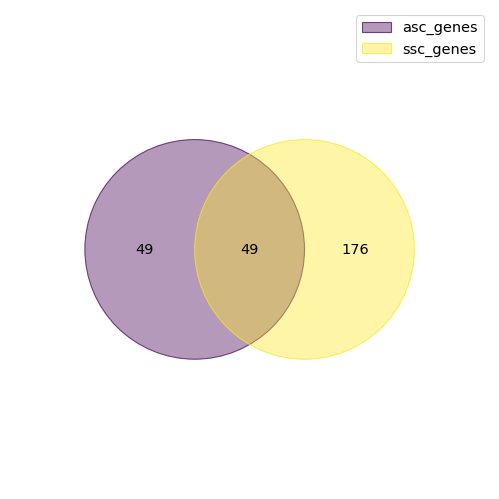

In [24]:
asc_genes = loadgenelist("../dat/genes/asd.asc.entrez.list")
ssc_genes = loadgenelist("../dat/genes/Jon.ssc.txt")
allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")
asc_genes_m = set(asc_genes).intersection(set(allen_mouse_genes))
ssc_genes_m = set(ssc_genes).intersection(set(allen_mouse_genes))
dat_dict = {"asc_genes": asc_genes_m, "ssc_genes":ssc_genes_m}
venn(dat_dict)

In [38]:
pli = pd.read_csv("/Users/jiayao/Work/Resources/fordist_cleaned_exac_r03_march16_z_pli_rec_null_data.txt", delimiter="\t")
print(pli.columns.values)

['transcript' 'gene' 'chr' 'n_exons' 'cds_start' 'cds_end' 'bp' 'mu_syn'
 'mu_mis' 'mu_lof' 'n_syn' 'n_mis' 'n_lof' 'exp_syn' 'exp_mis' 'exp_lof'
 'syn_z' 'mis_z' 'lof_z' 'pLI' 'pRec' 'pNull']


In [71]:
pli = pli.sort_values("pLI", ascending=False)
WriteGeneList([GeneSymbol2Entrez[x] for x in pli.head(120)["gene"] if x in GeneSymbol2Entrez], "../dat/genes/top_pLI.100.txt")

In [43]:
ssc_genes = loadgenelist("../dat/genes/Jon.ssc.txt")
asc_genes = loadgenelist("../dat/genes/asd.asc.entrez.list")
spark_tol_genes = loadgenelist("../dat/genes/Jon.spark.txt")
spark_tada_genes = loadgenelist("../dat/genes/asd.spark.tada.txt")
pli_ssc_wigler = pli[pli["gene"].isin([Entrez2Symbol[x] for x in ssc_genes if x in Entrez2Symbol])]["pLI"].values
pli_asc_tada = pli[pli["gene"].isin([Entrez2Symbol[x] for x in asc_genes if x in Entrez2Symbol])]["pLI"].values
pli_spark_wigler = pli[pli["gene"].isin([Entrez2Symbol[x] for x in spark_tol_genes if x in Entrez2Symbol])]["pLI"].values
pli_spark_tada = pli[pli["gene"].isin([Entrez2Symbol[x] for x in spark_tada_genes if x in Entrez2Symbol])]["pLI"].values

0.8666666666666667


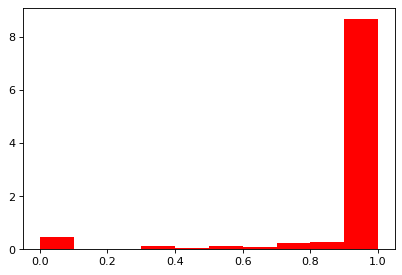

0.87


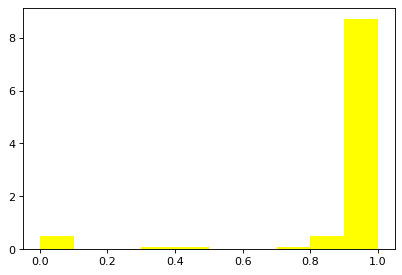

0.8013029315960912


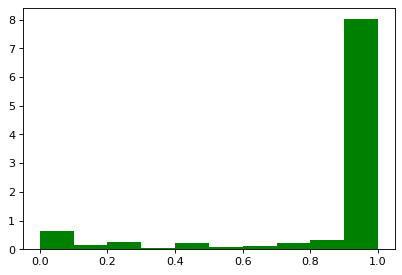

0.8785046728971962


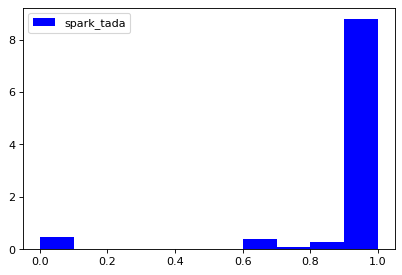

In [56]:
plt.hist(pli_ssc_wigler, color='red', label="ssc_tol", density=1)
print(len([x for x in pli_ssc_wigler if x > 0.9])/len(pli_ssc_wigler))
plt.show()
plt.hist(pli_asc_tada, color="yellow", label="asc_tada", density=1)
print(len([x for x in pli_asc_tada if x > 0.9])/len(pli_asc_tada))
plt.show()
plt.hist(pli_spark_wigler, color="green", label="spark_tol", density=1)
print(len([x for x in pli_spark_wigler if x > 0.9])/len(pli_spark_wigler))
plt.show()
plt.hist(pli_spark_tada, color="blue", label="spark_tada", density=1)
print(len([x for x in pli_spark_tada if x > 0.9])/len(pli_spark_tada))
plt.legend()
plt.show()

In [37]:
asc_sub_ssc = list(set(asc_genes_m).difference(set(ssc_genes_m)))
ssc_sub_asc = list(set(ssc_genes_m).difference(set(asc_genes_m)))
f = open("../dat/genes/asc_sub_ssc.txt", 'wt')
for g in asc_sub_ssc:
    f.write(str(g)+"\n")
f.close()
f = open("../dat/genes/ssc_sub_asc.txt", 'wt')
for g in ssc_sub_asc:
    f.write(str(g)+"\n")
f.close()

In [36]:
len(asc_sub_ssc)

49

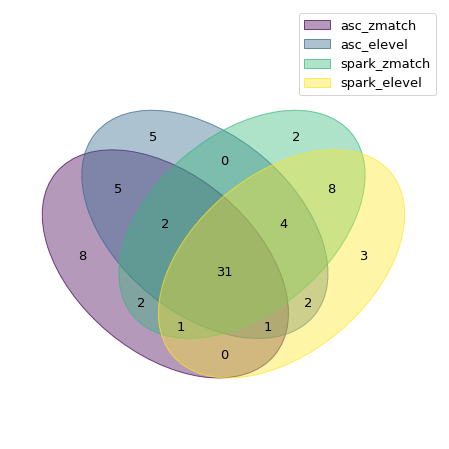

In [11]:
asc_zmatch_bias = pd.read_csv("dat/bias/asd.asc.zmatch.rank.csv", index_col="STR")
asc_elevel_bias = pd.read_csv("dat/bias/asc.explevel.rank.tsv", index_col="STR")
spark_zmatch_bias = pd.read_csv("dat/bias/asd.sparktada.zmatch.rank.csv", index_col="STR")
spark_elevel_bias = pd.read_csv("dat/bias/sparktada.explevel.rank.tsv", index_col="STR")
asc_zmatch_top50 = set(asc_zmatch_bias.head(50).index.values)
asc_elevel_top50 = set(asc_elevel_bias.head(50).index.values)
spark_zmatch_top50 = set(spark_zmatch_bias.head(50).index.values)
spark_elevel_top50 = set(spark_elevel_bias.head(50).index.values)
dat_dict = {"asc_zmatch": asc_zmatch_top50, "asc_elevel":asc_elevel_top50, 
            "spark_zmatch": spark_zmatch_top50, "spark_elevel":spark_elevel_top50}
venn(dat_dict)

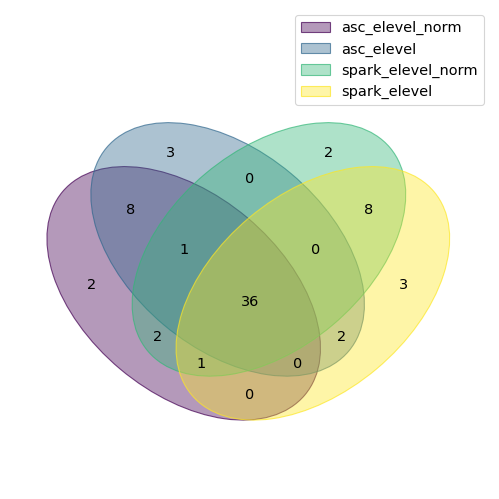

In [19]:
asc_zmatch_bias = pd.read_csv("dat/bias/asc.norm.explevel.rank.tsv", index_col="STR")
asc_elevel_bias = pd.read_csv("dat/bias/asc.explevel.rank.tsv", index_col="STR")
spark_zmatch_bias = pd.read_csv("dat/bias/sparktada.norm.explevel.rank.tsv", index_col="STR")
spark_elevel_bias = pd.read_csv("dat/bias/sparktada.explevel.rank.tsv", index_col="STR")
asc_zmatch_top50 = set(asc_zmatch_bias.head(50).index.values)
asc_elevel_top50 = set(asc_elevel_bias.head(50).index.values)
spark_zmatch_top50 = set(spark_zmatch_bias.head(50).index.values)
spark_elevel_top50 = set(spark_elevel_bias.head(50).index.values)
dat_dict = {"asc_elevel_norm": asc_zmatch_top50, "asc_elevel":asc_elevel_top50, 
            "spark_elevel_norm": spark_zmatch_top50, "spark_elevel":spark_elevel_top50}
venn(dat_dict)

In [20]:
spark_zmatch_top50.difference(spark_elevel_top50)

{'Basomedial_amygdalar_nucleus',
 'Endopiriform_nucleus_dorsal_part',
 'Intercalated_amygdalar_nucleus',
 'Nucleus_accumbens',
 'Subiculum_ventral_part'}

In [21]:
spark_elevel_top50.difference(spark_zmatch_top50)

{'Dorsal_auditory_area',
 'Lateral_amygdalar_nucleus',
 'Main_olfactory_bulb',
 'Primary_auditory_area',
 'Ventral_auditory_area'}

In [22]:
asc_zmatch_top50.difference(asc_elevel_top50)

{'Caudoputamen',
 'Dorsal_part_of_the_lateral_geniculate_complex',
 'Endopiriform_nucleus_dorsal_part',
 'Olfactory_tubercle',
 'Subiculum_ventral_part'}

In [23]:
asc_elevel_top50.difference(asc_zmatch_top50)

{'Anterior_pretectal_nucleus',
 'Dorsal_auditory_area',
 'Medial_geniculate_complex_medial_part',
 'Perirhinal_area',
 'Primary_auditory_area'}

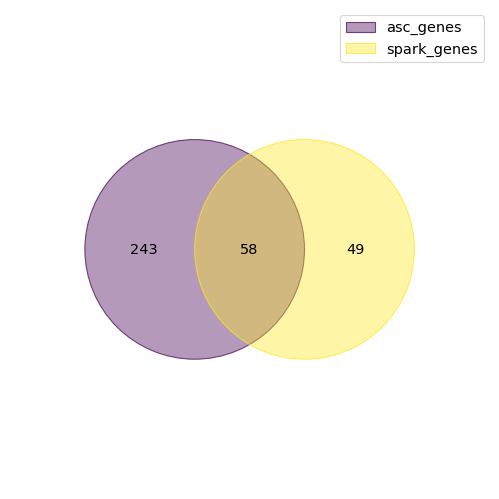

In [17]:
asc_genes = loadgenelist("../dat/genes/Jon.spark.txt")
spark_genes = loadgenelist("../dat/genes/asd.spark.tada.txt")
allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")
asc_genes_m = set(asc_genes).intersection(set(allen_mouse_genes))
spark_genes_m = set(spark_genes).intersection(set(allen_mouse_genes))
dat_dict = {"asc_genes": asc_genes_m, "spark_genes":spark_genes_m}
venn(dat_dict)

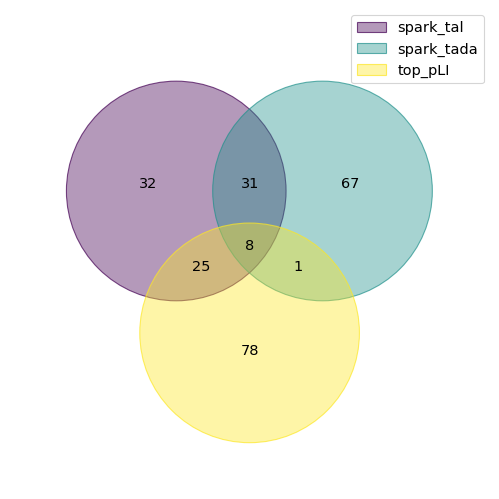

In [84]:
ssc_spark_tal = pd.read_csv("../dat/genes/spark-simplex.csv")
top100_spark_tal = list(set([int(x) for x in ssc_spark_tal.head(120)["GENE"].values]))
spark_tada = loadgenelist("../dat/genes/asd.spark.tada.txt")
tal_genes = loadgenelist("../dat/genes/top_pLI.100.txt")
allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")
spark_tal_m = set(top100_spark_tal).intersection(set(allen_mouse_genes))
spark_tada_m = set(spark_tada).intersection(set(allen_mouse_genes))
top_pLI_m = set(tal_genes).intersection(set(allen_mouse_genes))
dat_dict = {"spark_tal": spark_tal_m, "spark_tada":spark_tada_m, "top_pLI":top_pLI_m}
venn(dat_dict)

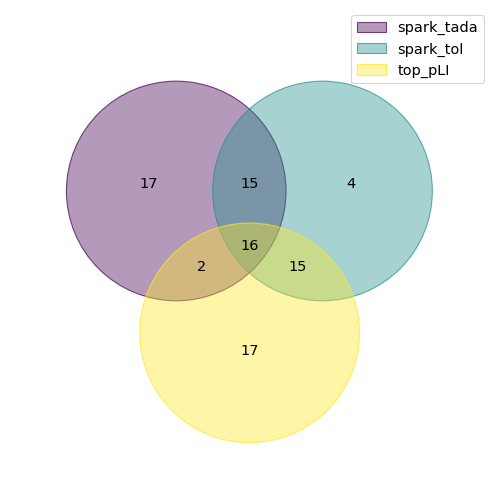

In [86]:
spark_tada_bias = pd.read_csv("dat/bias/sparktada.norm.explevel.rank.tsv", index_col="STR")
spark_tol_bias = pd.read_csv("dat/bias/sparktol.norm.explevel.100.rank.tsv", index_col="STR")
top_pLI_bias = pd.read_csv("dat/bias/top_pLI.norm.explevel.rank.tsv", index_col="STR")

spark_tada_top50 = set(spark_tada_bias.head(50).index.values)
spark_tol_top50 = set(spark_tol_bias.head(50).index.values)
top_pLI_top50 = set(top_pLI_bias.head(50).index.values)
dat_dict = {
            "spark_tada": spark_tada_top50, "spark_tol":spark_tol_top50, "top_pLI":top_pLI_top50}
venn(dat_dict)

In [ ]:
spark_elevel_bias = pd.read_csv("dat/bias/asd.norm.sparktada.zmatch.rank.csv", index_col="STR")
spark_elevel_lofz_bias = pd.read_csv("dat/bias/asd.norm.lofz.sparktada.zmatch.rank.csv", index_col="STR")
spark_elevel_top50 = set(spark_elevel_bias.head(50).index.values)
spark_elevel_lofz_top50 = set(spark_elevel_lofz_bias.head(50).index.values)
dat_dict = {
            "asc_zmatch_norm": spark_elevel_top50, "asc_zmatch_norm_lofz":spark_elevel_lofz_top50}
venn(dat_dict)

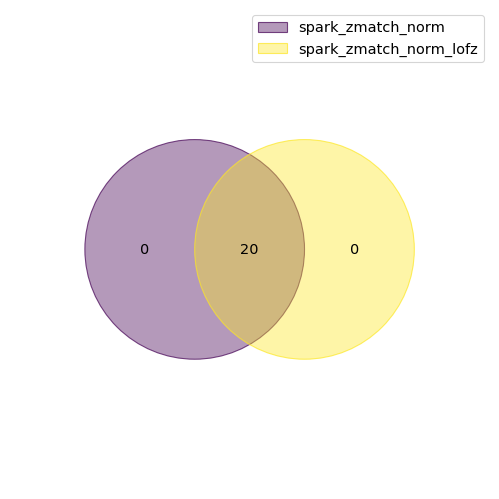

In [94]:
spark_elevel_bias = pd.read_csv("dat/bias/asd.norm.sparktada.zmatch.rank.csv", index_col="STR")
spark_elevel_lofz_bias = pd.read_csv("dat/bias/asd.norm.lofz.sparktada.zmatch.rank.csv", index_col="STR")
spark_elevel_top50 = set(spark_elevel_bias.head(20).index.values)
spark_elevel_lofz_top50 = set(spark_elevel_lofz_bias.head(20).index.values)
dat_dict = {
            "spark_zmatch_norm": spark_elevel_top50, "spark_zmatch_norm_lofz":spark_elevel_lofz_top50}
venn(dat_dict)

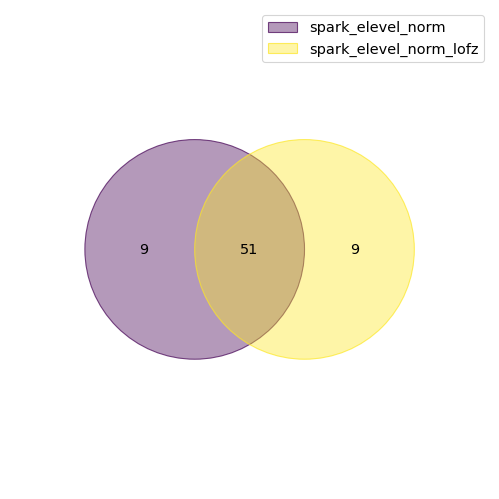

In [98]:
###### spark_elevel_bias = pd.read_csv("dat/bias/sparktada.norm.explevel.rank.tsv", index_col="STR")
spark_elevel_lofz_bias = pd.read_csv("dat/bias/sparktada.norm.lofz.explevel.rank.tsv", index_col="STR")
spark_elevel_top50 = set(spark_elevel_bias.head(60).index.values)
spark_elevel_lofz_top50 = set(spark_elevel_lofz_bias.head(60).index.values)
dat_dict = {
            "spark_elevel_norm": spark_elevel_top50, "spark_elevel_norm_lofz":spark_elevel_lofz_top50}
venn(dat_dict)

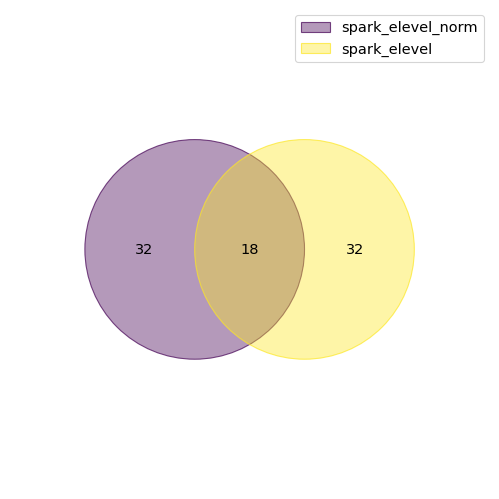

In [82]:
spark_zmatch_bias = pd.read_csv("dat/bias/sparktada.norm.explevel.rank.tsv", index_col="STR")
spark_elevel_bias = pd.read_csv("dat/bias/top_pLI.norm.explevel.rank.tsv", index_col="STR")
asc_zmatch_top50 = set(asc_zmatch_bias.head(50).index.values)
asc_elevel_top50 = set(asc_elevel_bias.head(50).index.values)
spark_zmatch_top50 = set(spark_zmatch_bias.head(50).index.values)
spark_elevel_top50 = set(spark_elevel_bias.head(50).index.values)
dat_dict = {
            "spark_elevel_norm": spark_zmatch_top50, "spark_elevel":spark_elevel_top50}
venn(dat_dict)

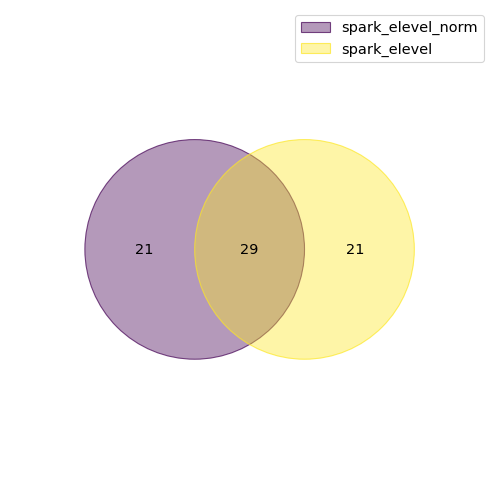

In [18]:
spark_zmatch_bias = pd.read_csv("dat/bias/sparktada.norm.explevel.rank.tsv", index_col="STR")
spark_elevel_bias = pd.read_csv("dat/bias/spark.diff.explevel.rank.tsv", index_col="STR")
asc_zmatch_top50 = set(asc_zmatch_bias.head(50).index.values)
asc_elevel_top50 = set(asc_elevel_bias.head(50).index.values)
spark_zmatch_top50 = set(spark_zmatch_bias.head(50).index.values)
spark_elevel_top50 = set(spark_elevel_bias.head(50).index.values)
dat_dict = {
            "spark_elevel_norm": spark_zmatch_top50, "spark_elevel":spark_elevel_top50}
venn(dat_dict)

In [4]:
asd_ssc = loadgenelist("../dat/genes/asd.ssc.entrez.list")
asd_spark = loadgenelist("../dat/genes/asd.spark.entrez.list")

In [4]:
jon_ssc = loadgenelist("../dat/genes/Jon.ssc.txt")
jon_spark = loadgenelist("../dat/genes/Jon.spark.txt")
jon_tada = loadgenelist("../dat/genes/Jon.tada.txt")
allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

In [5]:
jon_ssc_m = list(set(jon_ssc).intersection(set(allen_mouse_genes)))
jon_spark_m = list(set(jon_spark).intersection(set(allen_mouse_genes)))
jon_tada_m = list(set(jon_tada).intersection(set(allen_mouse_genes)))

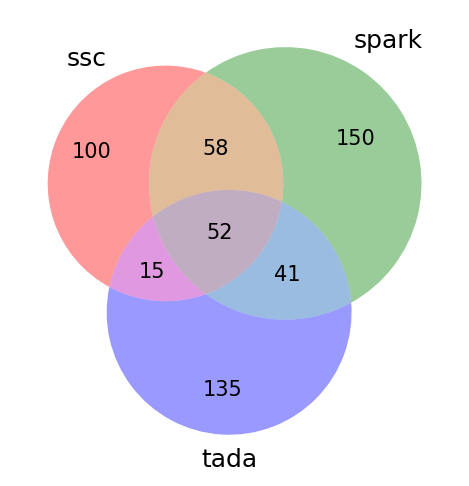

In [56]:
plt.figure(dpi=150)
v = venn3([set(jon_ssc_m), set(jon_spark_m), set(jon_tada_m)], 
      set_labels = ('ssc', 'spark', 'tada'))

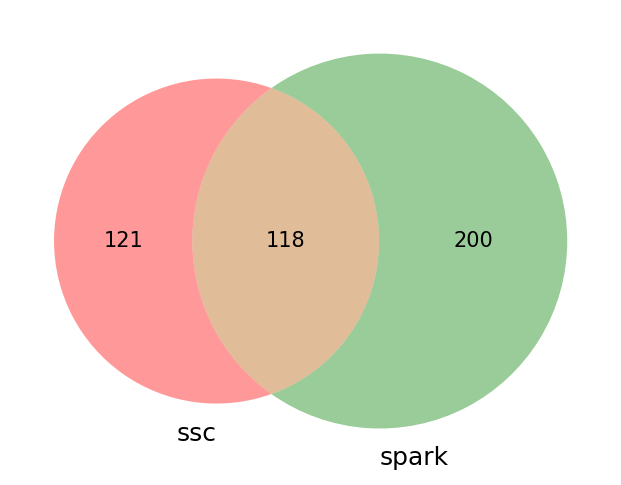

In [49]:
plt.figure(dpi=150)
v = venn2([set(jon_ssc), set(jon_spark)], 
      set_labels = ('ssc', 'spark'))

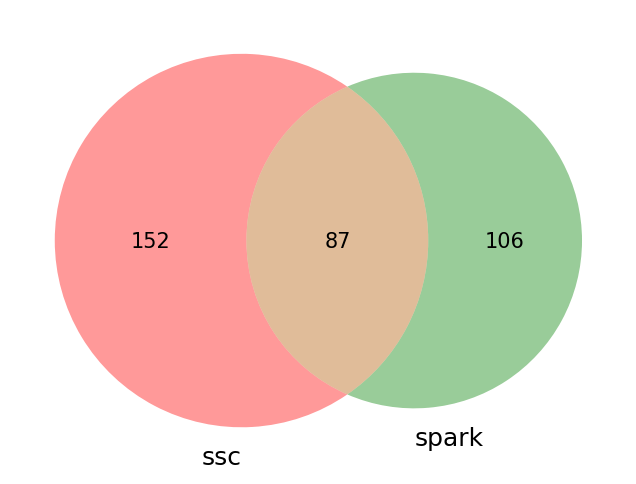

In [5]:
from matplotlib_venn import venn2, venn2_circles
plt.figure(dpi=150)
v = venn2([set(asd_ssc), set(asd_spark)], 
      set_labels = ('ssc', 'spark'))

In [47]:
62 + 56 + 41 + 159

318

In [6]:
ssc_strs = QuantileAVGScoring(ExpZscoreMat, jon_ssc_m)
spark_strs = QuantileAVGScoring(ExpZscoreMat, jon_spark_m)

In [7]:
ssc_strs

,STR,Bias
40,Dentate_gyrus,0.634667
13,Accessory_olfactory_bulb,0.619356
75,Lateral_posterior_nucleus_of_the_thalamus,0.613261
26,Field_CA3,0.609624
24,Field_CA1,0.606706
...,...,...
195,Motor_nucleus_of_trigeminal,0.405575
152,Nucleus_raphe_magnus,0.402553
82,Magnocellular_reticular_nucleus,0.398087
197,Ventral_cochlear_nucleus,0.387731


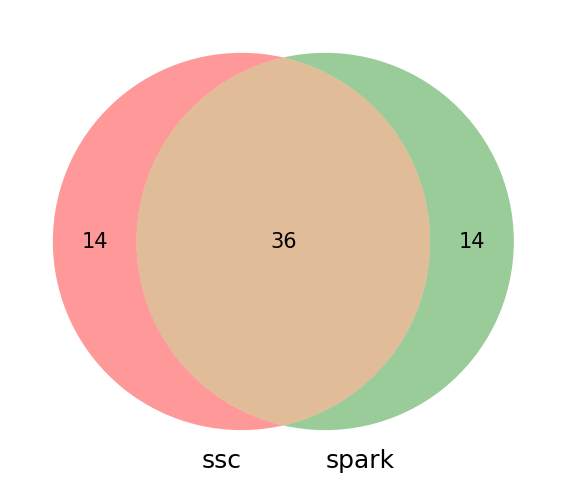

In [59]:
from matplotlib_venn import venn2, venn2_circles
plt.figure(dpi=150)
v = venn2([set(ssc_strs["STR"].values[:50]), set(spark_strs["STR"].values[:50])], 
      set_labels = ('ssc', 'spark'))

In [60]:
overlaps = []
for i in range(1000):
    xx1 = np.random.choice(brain_exp_genes, 118)
    xx2 = np.random.choice(brain_exp_genes, 121)
    xx3 = np.random.choice(brain_exp_genes, 200)
    set1 = np.concatenate((xx1, xx2))
    set2 = np.concatenate((xx1, xx3))
    set1_strs = QuantileAVGScoring(ExpZscoreMat, set1)
    set2_strs = QuantileAVGScoring(ExpZscoreMat, set2)
    str_overlap = len(set(set1_strs["STR"].values[:50]).intersection(set(set2_strs["STR"].values[:50])))
    overlaps.append(str_overlap)

(array([  9.,  14.,  74., 118., 182., 304., 147., 121.,  25.,   6.]),
 array([ 7. , 10.4, 13.8, 17.2, 20.6, 24. , 27.4, 30.8, 34.2, 37.6, 41. ]),
 <a list of 10 Patch objects>)

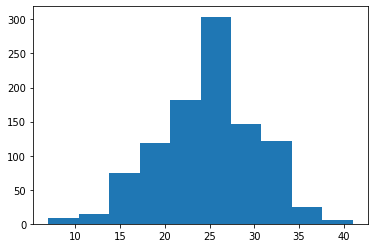

In [ ]:
plt.hist(overlaps)

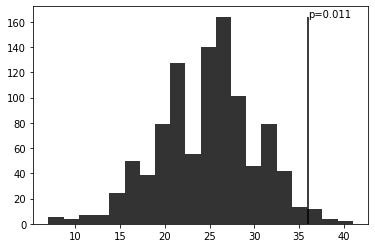

In [63]:
PlotPermutationP(overlaps, 36)